In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd

In [1]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base.metadata.create_all(engine)

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database
session.query(measurement.date).order_by(measurement.date.desc()).first()
latest = dt.date(2017, 8 ,23)
one_year = latest - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(query)
df1 = df.drop_duplicates(subset=['date'])
df1 = df1.set_index('date')
df1.duplicated()
# Sort the dataframe by 

# Use Pandas Plotting with Matplotlib to plot the data
#df1.plot(rot=90, figsize= (10,5))

#df1.to_json(orient='')
#new_df = df1.Index.drop_duplicates()

#new_df

date
2016-08-23    False
2016-08-24    False
2016-08-25     True
2016-08-26     True
2016-08-27     True
              ...  
2017-05-09    False
2017-05-26     True
2017-07-19     True
2017-08-16     True
2017-08-17     True
Length: 366, dtype: bool

In [55]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df1.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [67]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(station).\
    count()    
print(f"There are {stations} stations in this dataset")

There are 9 stations in this dataset


In [84]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_query = session.query(measurement.date, measurement.station).\
    all()
station_df = pd.DataFrame(station_query)
station_df["station"].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [96]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = session.query(measurement.station, measurement.tobs).\
    filter(measurement.station == 'USC00519281')
most_active_df = pd.DataFrame(most_active)
lowest = most_active_df["tobs"].min()
highest = most_active_df["tobs"].max()
average = most_active_df["tobs"].mean()
print(f"The lowest temperature recorded at station USC00519281 was {lowest}")
print(f"The highest temperature recorded at station USC00519281 was {highest}")
print(f"The average temperature recorded at station USC00519281 is {average}")

The lowest temperature recorded at station USC00519281 was 54.0
The highest temperature recorded at station USC00519281 was 85.0
The average temperature recorded at station USC00519281 is 71.66378066378067


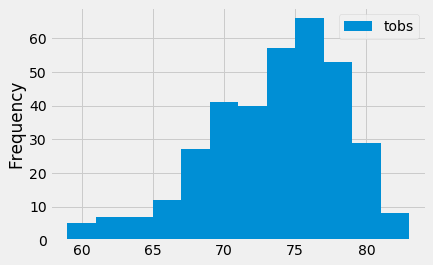

In [107]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_last = session.query(measurement.date, measurement.tobs, measurement.station).\
    filter(measurement.station == 'USC00519281').filter(measurement.date >= one_year).all()
df_last = pd.DataFrame(query_last)
dff = df_last.set_index('date')
dff.plot.hist(bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
